In [2]:
import requests
import pandas as pd

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
categories = ["NEWS", "POLR", "HUMR", "GRP", "ANON", "LGBT", "REL", "ENV", "PUBH", "DATE", "FILE", "COMT", "MMED", "HOST", "SRCH", "GAME", "CULTR", "ECON", "GOVT", "COMM", "IGO"]
results = []

for year in years:
    for category in categories:
        url = "https://api.ooni.io/api/v1/aggregation"
        params = {
            "axis_x": "probe_cc",
            "axis_y": "category_code",
            "test_name": "web_connectivity",
            "since": f"{year}-01-01",
            "until": f"{year}-12-31",
            "category_code": category
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            blocked_countries = set()
            for row in data.get("result", []):
                if row.get("confirmed_count", 0) > 0:
                    blocked_countries.add(row["probe_cc"])
            results.append({
                "year": year,
                "category": category,
                "num_countries": len(blocked_countries)
            })
        else:
            results.append({
                "year": year,
                "category": category,
                "num_countries": 0
            })

# Convert to DataFrame
df = pd.DataFrame(results)

In [4]:
import matplotlib.pyplot as plt

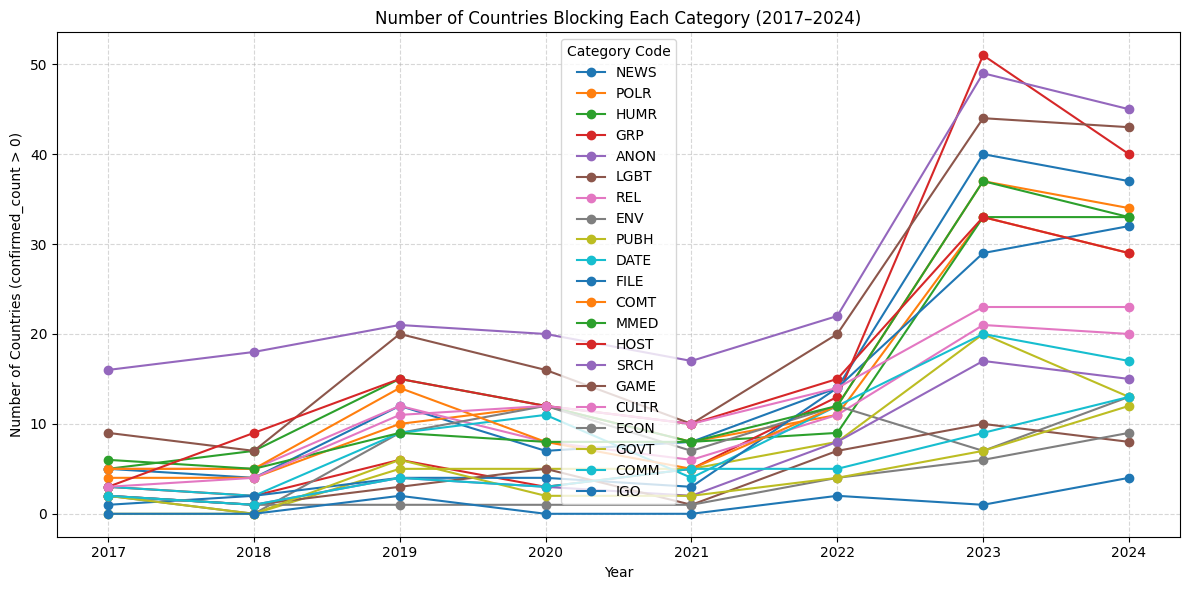

In [5]:
plt.figure(figsize=(12, 6))
for category in categories:
    subset = df[df["category"] == category]
    plt.plot(subset["year"], subset["num_countries"], marker='o', label=category)

plt.title("Number of Countries Blocking Each Category (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Countries (confirmed_count > 0)")
plt.xticks(years)
plt.legend(title="Category Code")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()